In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows", 15)

#### READ_CSV (read the csv file)

In [27]:
df = pd.read_csv(r"../archive/salary.csv")
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


#### DF.APPLY() (apply a function to a dataframe column)

In [28]:
df["Name"] = df["Name"].apply(lambda x: x.title())
df["Job Titles"] = df["Job Titles"].apply(lambda x: x.title())
df["Department"] = df["Department"].apply(lambda x: x.title())

df["Job Titles"] = df["Job Titles"].str.replace("\([^()]*\)", "", regex=True)

df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"Aaron, Jeffery M",Sergeant,Police,F,Salary,NaN,122568.0,NaN
1,"Aaron, Karina",Police Officer,Police,F,Salary,NaN,110796.0,NaN
2,"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,F,Salary,NaN,122112.0,NaN
3,"Abarca, Emmanuel",Concrete Laborer,Transportn,F,Hourly,40.0,NaN,45.9
4,"Abarca, Frances J",Police Officer,Police,F,Salary,NaN,86730.0,NaN


#### DF.ISNA().SUM() (check the number of NA values)

In [29]:
df["Typical Hours"].isna().sum()

24287

#### DF.DROP() (drop column or row)

In [30]:
df.drop(["Typical Hours"], axis=1, inplace=True)
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary,Hourly Rate
0,"Aaron, Jeffery M",Sergeant,Police,F,Salary,122568.0,NaN
1,"Aaron, Karina",Police Officer,Police,F,Salary,110796.0,NaN
2,"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,F,Salary,122112.0,NaN
3,"Abarca, Emmanuel",Concrete Laborer,Transportn,F,Hourly,NaN,45.9
4,"Abarca, Frances J",Police Officer,Police,F,Salary,86730.0,NaN


#### DF.LOC (filter a group of specific rows)

In [31]:
df.loc[df["Salary or Hourly"] == "Hourly", ["Annual Salary"]].head()

,Annual Salary
3,NaN
5,NaN
8,NaN
20,NaN
36,NaN


#### DF.ISIN() (filter a specific row value in a column)

In [32]:
df = df[df["Salary or Hourly"].isin(["Salary"])]
df.drop(["Hourly Rate"], axis=1, inplace=True)
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary
0,"Aaron, Jeffery M",Sergeant,Police,F,Salary,122568.0
1,"Aaron, Karina",Police Officer,Police,F,Salary,110796.0
2,"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,F,Salary,122112.0
4,"Abarca, Frances J",Police Officer,Police,F,Salary,86730.0
6,"Abbatemarco, James J",Fire Engineer-Emt,Fire,F,Salary,118830.0


In [33]:
df["Full or Part-Time"].unique()

array(['F'], dtype=object)

In [34]:
df.drop(["Full or Part-Time"], axis=1, inplace=True)
df.head()

,Name,Job Titles,Department,Salary or Hourly,Annual Salary
0,"Aaron, Jeffery M",Sergeant,Police,Salary,122568.0
1,"Aaron, Karina",Police Officer,Police,Salary,110796.0
2,"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,Salary,122112.0
4,"Abarca, Frances J",Police Officer,Police,Salary,86730.0
6,"Abbatemarco, James J",Fire Engineer-Emt,Fire,Salary,118830.0


#### DF.DUPLICATED() (check duplicated values)

In [35]:
df[df["Name"].duplicated(keep=False)]

,Name,Job Titles,Department,Salary or Hourly,Annual Salary
283,"Miller, William J",Firefighter-Emt,Fire,Salary,105936.0
284,"Miller, William J",Firefighter-Emt,Fire,Salary,84612.0
369,"Miranda, Eric",Police Officer,Police,Salary,82458.0
370,"Miranda, Eric",Police Officer,Police,Salary,95586.0
1053,"Anderson, Rhonda M",Administrative Asst Iii,Business Affairs,Salary,61020.0
...,...,...,...,...,...
29905,"Williams, Andre",Police Officer,Police,Salary,102372.0
30042,"Williams, Kimberly",Administrative Asst Ii,Human Resources,Salary,67668.0
30043,"Williams, Kimberly",Animal Care Aide Ii,Animal Contrl,Salary,61020.0
30219,"Wilson, Edward J",Ambulance Commander,Fire,Salary,130698.0


In [36]:
df.drop_duplicates(subset=["Name"], keep="first", inplace=True)

df.drop(["Salary or Hourly"], axis=1, inplace=True)
df.head()

,Name,Job Titles,Department,Annual Salary
0,"Aaron, Jeffery M",Sergeant,Police,122568.0
1,"Aaron, Karina",Police Officer,Police,110796.0
2,"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,122112.0
4,"Abarca, Frances J",Police Officer,Police,86730.0
6,"Abbatemarco, James J",Fire Engineer-Emt,Fire,118830.0


In [37]:
df.set_index(["Name"], inplace=True)
df.head()

,Job Titles,Department,Annual Salary
Name,,,
"Aaron, Jeffery M",Sergeant,Police,122568.0
"Aaron, Karina",Police Officer,Police,110796.0
"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,122112.0
"Abarca, Frances J",Police Officer,Police,86730.0
"Abbatemarco, James J",Fire Engineer-Emt,Fire,118830.0


In [38]:
df.index

Index(['Aaron,  Jeffery M', 'Aaron,  Karina', 'Abad Jr,  Vicente M',
       'Abarca,  Frances J', 'Abbatemarco,  James J', 'Abbate,  Terry M',
       'Abbott,  Carmella', 'Abdallah,  Maram M', 'Abdallah,  Zaid',
       'Abdelhadi,  Abdalmahd',
       ...
       'Zwolfer,  Matthew W', 'Zych,  Lukasz', 'Zych,  Mateusz',
       'Zydek,  Bryan', 'Zygmunt,  Dawid', 'Zylinska,  Klaudia',
       'Zymantas,  Laura C', 'Zymantas,  Mark E', 'Zyrkowski,  Carlo E',
       'Zyskowski,  Dariusz'],
      dtype='object', name='Name', length=24125)

In [39]:
df.index = df.index.str.replace("  ", " ", regex=False)

#### DF.DTYPES (check type of each column of a dataframe)

In [40]:
df.dtypes

Job Titles        object
Department        object
Annual Salary    float64
dtype: object

In [41]:
df["Annual Salary"] = df["Annual Salary"].astype(int)

In [42]:
df.head()

,Job Titles,Department,Annual Salary
Name,,,
"Aaron, Jeffery M",Sergeant,Police,122568
"Aaron, Karina",Police Officer,Police,110796
"Abad Jr, Vicente M",Civil Engineer Iv,Water Mgmnt,122112
"Abarca, Frances J",Police Officer,Police,86730
"Abbatemarco, James J",Fire Engineer-Emt,Fire,118830


#### GROUPBY() (group data)

In [43]:
grp = df.groupby(["Department"])["Annual Salary"].mean().to_frame().sort_values(by="Annual Salary", ascending=False)
grp["Average Annual Salary"] = grp["Annual Salary"].apply(lambda x: int(x))
grp.drop(["Annual Salary"], axis=1, inplace=True)
grp

,Average Annual Salary
Department,
Buildings,113118
Budget & Mgmt,108248
Mayor'S Office,107382
Board Of Ethics,106917
Fire,106028
...,...
Animal Contrl,78443
City Clerk,77996
Public Library,77236


#### DF.NLARGEST() (get top N for a column)

In [44]:
top_3 = df.nlargest(3, ["Annual Salary"]).sort_values(by="Annual Salary", ascending=False)
top_3

,Job Titles,Department,Annual Salary
Name,,,
"Rhee, Jamie L",Commissioner Of Aviation,Aviation,275004
"Brown, David O",Superintendent Of Police,Police,260004
"Nance Holt, Annette M",Fire Commissioner,Fire,228612


In [45]:
df["Job Titles"].unique()
df["Job Titles"] = df["Job Titles"].str.strip()
df["Job Titles"] = df["Job Titles"].str.replace(" -", "/", regex=False).str.replace("/ ", "/", regex=False).str.replace(
                   "-Emt", "/Emt", regex=False)

In [46]:
firejobs = df[df["Department"].isin(["Fire"])]
firejobslist = firejobs["Job Titles"].value_counts()
firejobslist.to_frame()

,Job Titles
Firefighter/Emt,2120
Lieutenant/Emt,399
Paramedic,383
Fire Engineer/Emt,371
Firefighter/Paramedic,313
...,...
Dir /Community Liaison,1
Deputy Commissioner,1
Coord Of Fire Awareness,1
Labor Relations Specialist,1


In [47]:
firejobs_copy = firejobs.copy()
firejobs_copy = firejobs_copy.groupby(["Job Titles"])["Annual Salary"].mean().to_frame().sort_values(by="Annual Salary",
                ascending=False)
firejobs_copy

,Annual Salary
Job Titles,
Fire Commissioner,228612.0
First Deputy Fire Commissioner,207624.0
Deputy Fire Commissioner,197064.0
Asst Deputy Fire Commissioner,194616.0
District Chief,182640.0
...,...
Associate Fire Prevention Engineer,67536.0
Investigator,65076.0
Clerk Iv,55620.0


#### ---VISUALIZATION---

#### BOXPLOT

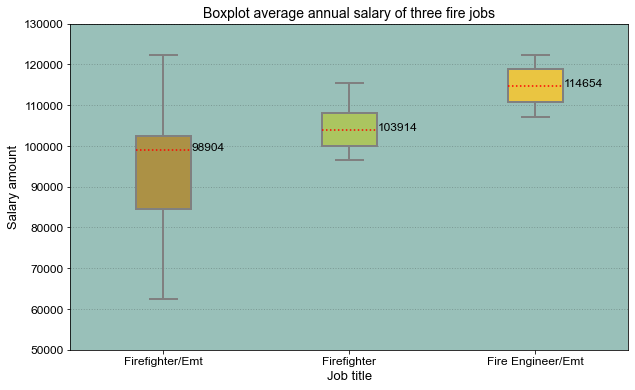

In [48]:
fire_emt = df[df["Job Titles"].isin(["Firefighter/Emt"])]
fire_eng_emt = df[df["Job Titles"].isin(["Fire Engineer/Emt"])]
firefighter = df[df["Job Titles"].isin(["Firefighter"])]

plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig, ax = plot_objects

ax.set_facecolor("#026352")
ax.patch.set_alpha(0.4)
ax.grid(which="major", axis="y", linestyle=":", linewidth=1, color="black", alpha=0.2)

box = plt.boxplot([fire_emt["Annual Salary"],
                   firefighter["Annual Salary"],
                   fire_eng_emt["Annual Salary"]],
                   patch_artist=True,
                   boxprops={"color":"grey", "linewidth":2},
                   whiskerprops={"color":"grey", "linewidth":2},
                   capprops={"color":"grey", "linewidth":2},
                   medianprops={"color":"red", "linestyle":":", "linewidth":1.5})

colors = ["#AC9145", "#ABC560", "#EAC541"]

for each, col in zip(box["boxes"], colors):
    each.set_facecolor(col)
    
plt.yticks(family="Arial", fontsize=12)
plt.xticks(family="Arial", fontsize=12)
ax.set_title("Boxplot average annual salary of three fire jobs", family="Arial", fontsize=14)
ax.set_ylabel("Salary amount", family="Arial", fontsize=13)
ax.set_xlabel("Job title", family="Arial", fontsize=13)

xticks = ax.get_xticks().tolist()
ax.xaxis.set_ticks(xticks)
ax.xaxis.set_ticklabels(["Firefighter/Emt", "Firefighter", "Fire Engineer/Emt"])

ax.set_ylim(50000, 130000)

for i, line in enumerate(box["medians"]):
    x, y = line.get_xydata()[1]
    y = int(y)
    ax.annotate(y, xy=(x, y), family="Arial", fontsize=12)

#### BAR PLOT

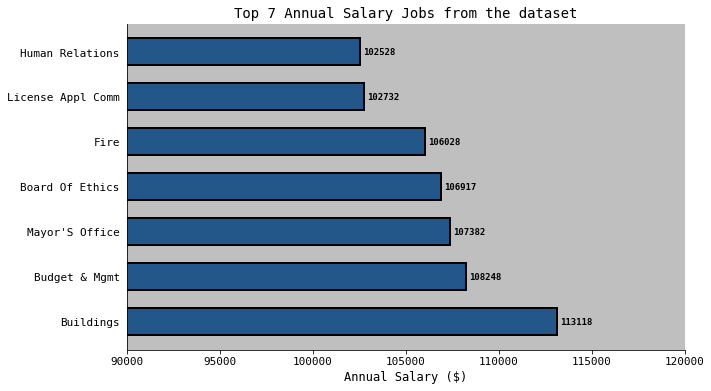

In [49]:
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig, ax = plot_objects

ax.set_facecolor("grey")
ax.patch.set_alpha(0.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

bar = ax.barh(grp.index[:7], grp["Average Annual Salary"][:7], edgecolor="black", linewidth=2, color="#235689",
              height=0.6)

ax.set_xlim(90000, 120000)

ax.bar_label(bar, padding=3, family="monospace", fontsize=9, fontweight="bold")

plt.yticks(family="monospace", fontsize=11)
plt.xticks(family="monospace", fontsize=11)

ax.set_xlabel("Annual Salary ($)", family="monospace", fontsize=12)

ax.set_title("Top 7 Annual Salary Jobs from the dataset", family="monospace", fontsize=14)

ax.yaxis.set_ticks_position("none")

#### VIOLIN PLOT

Text(0.5, 1.0, 'Violinplot of three jobs field')

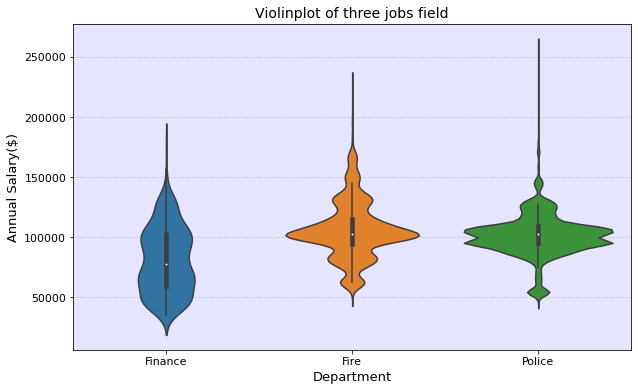

In [50]:
df_firepolfin = df[(df["Department"] == "Fire") | (df["Department"] == "Police") | (df["Department"] == "Finance")]
df_firepolfin

plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig, ax = plot_objects

ax.set_facecolor("blue")
ax.patch.set_alpha(0.1)
ax.grid(axis="y", which="major", linestyle=":", alpha=1)
ax.set_axisbelow(True)

viol = sns.violinplot(data=df_firepolfin, x=df_firepolfin["Department"], y=df_firepolfin["Annual Salary"],
                      order=["Finance", "Fire", "Police"])

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
ax.set_ylabel("Annual Salary($)", fontsize=13)
ax.set_xlabel("Department", fontsize=13)
ax.set_title("Violinplot of three jobs field", fontsize=14)